In [45]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

Hacer con las cosas que hay en svrCrossValidate y que el train_test_split este stratificado

In [51]:
#Carga de datos
df = pd.read_csv('acuario.csv', sep=',')
y = np.array(df['Peso'])
X = np.array(df.drop('Peso',axis=1))
#Visualización de los primeros datos
print(df.head())

   Especie   Peso  Long_vert  Long_diag  Long_tras   Altura   Ancho
0        0  242.0       23.2       25.4       30.0  11.5200  4.0200
1        0  290.0       24.0       26.3       31.2  12.4800  4.3056
2        0  340.0       23.9       26.5       31.1  12.3778  4.6961
3        0  363.0       26.3       29.0       33.5  12.7300  4.4555
4        0  430.0       26.5       29.0       34.0  12.4440  5.1340


He elegido este modelo ya que es más versatil y realmente se entrena ya que usamos el X_train y el y_train para trabajar el modelo a diferencia de otros. En otros casos se usa el conjunto de datos completo y a la hora de predecir "se sabe los resultados" lo que hace la predcción no sea real. En este caso vemos que a pesar de usar los datos de train sacamos un modelo casi perfecto

In [ ]:

pf = PolynomialFeatures(degree=2)
#Modifica los datos para poder detectar posibles curvas
X_pol = pf.fit_transform(X)
#Dividir los datos transformados
X_train, X_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=42)
model = LinearRegression()
#Entrenar con los datos recogidos
model.fit(X_train, y_train)
print(f"Score del modelo: {model.score(X_test, y_test)}")

Score del modelo: 0.9721144375112499


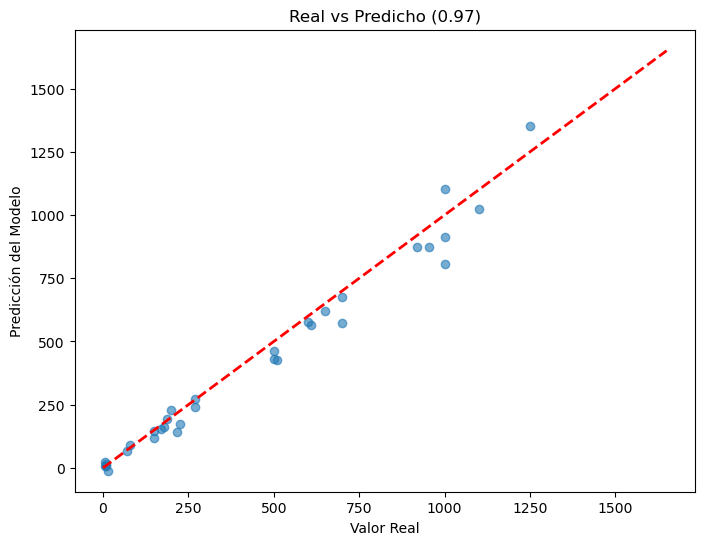

In [52]:
#Imprimir los datos entre los datos reales y los prodichos para ver de forma gráfica como se factible es el modelo.

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6) # Pinta los puntos
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Pinta la línea diagonal
plt.xlabel("Valor Real")
plt.ylabel("Predicción del Modelo")
plt.title(f"Real vs Predicho ({model.score(X_test, y_test):.2f})")
plt.show()

Sabermos que hay diferentes modelos que podemos usar para entrenar y sacar la información que queremos, para determinar cual de todas es mejor, podemos ver los resultados que nos están dando, lo que significa que a más cerca del 1 mejor es el modelo que vamos a usar, de este modo, el que he hecho el mejor ya que está muy cerca del 1, lo que nos indica que es practicamente perfecto. Con esto sabemos que la mayoría de veces que vayamos a predecir un peso de un pez casi siempre nos va a dar bien. En este caso no podemos representarlo en una gráfica ya que tenemos demasiadas dimensiones, pero lo podemos pintar con los datos de "y" y con los datos predichos, teniendo una gráfica 2D que si es factible de representar para poder ver de forma gráfica que método es mejor.